# Data Exploratory Analysis

In [1]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv

In [16]:
path = 'C:/Users/ndine/archive (5)/data/Lung Segmentation/'
masks = path + 'masks/'
test = path + 'test/'
cxr = path + 'CXR_png/'
clinical_readings = path + 'ClinicalReadings/'

In [3]:
MCU_count = CHN_count = healthy = abnormal = MCU_healthy = MCU_abnormal = CHN_healthy = CHN_abnormal = 0

total_images = glob.glob(cxr + "*.png") 
for img in total_images:
    if img.__contains__('MCUCXR'):
        MCU_count += 1
        if img.endswith('0.png'):
            MCU_healthy += 1
        if img.endswith('1.png'):
            MCU_abnormal += 1
    if img.__contains__('CHNCXR'):
        CHN_count += 1
        if img.endswith('0.png'):
            CHN_healthy += 1
        if img.endswith('1.png'):
            CHN_abnormal += 1
    if img.endswith('0.png'):
        healthy += 1
    if img.endswith('1.png'):
        abnormal += 1

# Determining whether datasets are balanced or imbalanced.

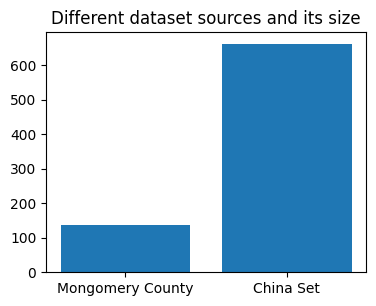

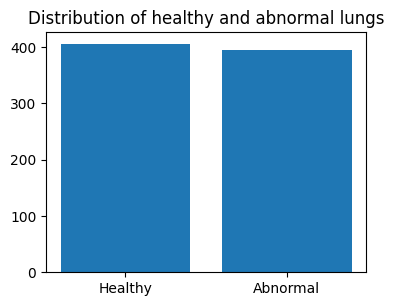

In [4]:
dataset_sources = ['Mongomery County', 'China Set']
dataset_size = [MCU_count, CHN_count]
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])
ax.bar(dataset_sources,dataset_size)
plt.title('Different dataset sources and its size')
plt.show()

lung_condition = ['Healthy', 'Abnormal']
lung_condition_samples = [healthy, abnormal]
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])
ax.bar(lung_condition,lung_condition_samples)
plt.title("Distribution of healthy and abnormal lungs")
plt.show()

From the above figues we can cleary see, there is an imbalance in the data contribution from two different data sources. Around 150 data entries from Mongomery County and around 650 data entries from China set. Even though the contribution is imbalanced from the data sources, the distibution of healthy and abnormal lung conditioned patients is balanced, which is most important in the expriment performing. 

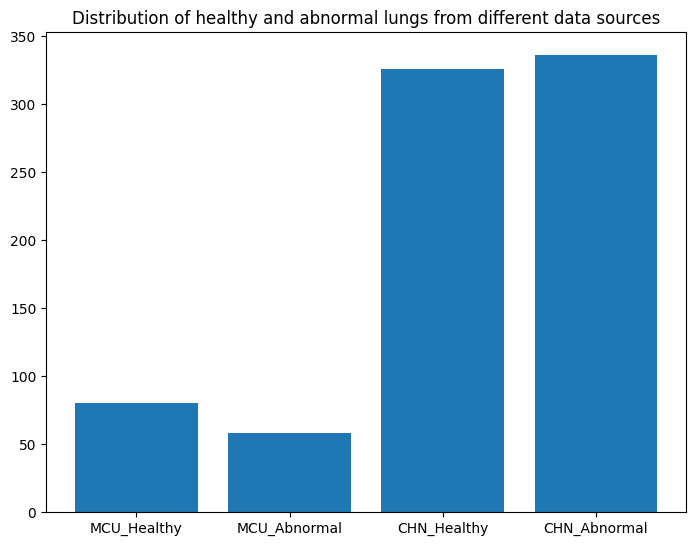

In [5]:
dataset_source_lung_condition = ['MCU_Healthy', 'MCU_Abnormal','CHN_Healthy', 'CHN_Abnormal']
dataset_source_lung_condition_samples = [MCU_healthy , MCU_abnormal , CHN_healthy , CHN_abnormal]
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.bar(dataset_source_lung_condition,dataset_source_lung_condition_samples)
plt.title("Distribution of healthy and abnormal lungs from different data sources")
plt.show()

In both the considered datasets, there is almost perfectly balanced distibution between healthy and abnormal lung conditions.

# Matching all the images with their ground-truths.

In [234]:
image_names = glob.glob(cxr + "*.png")
image_names.sort()
image_names_subset = image_names[0:10]

In [235]:
#images = [cv2.imread(image, 1) for image in image_names] 
#image_dataset = np.array(images, dtype=object)


In [236]:
images = [cv2.imread(image, 1) for image in image_names_subset] 
image_dataset = np.array(images, dtype=object)

In [237]:
mask_names = glob.glob(masks + "*.png")
mask_names.sort()
mask_names_subset = mask_names[0:10]

In [238]:
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset = np.array(masks, dtype=object)

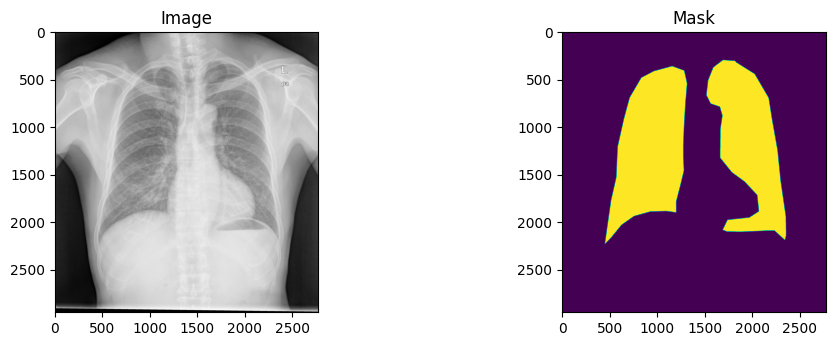

In [239]:
import random
img_number = random.randint(0, 9)
img = image_dataset[img_number]
mask = mask_dataset[img_number]
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.title('Image')
plt.imshow(img)
plt.subplot(222)
plt.title('Mask')
plt.imshow(mask)
plt.show()

From the above comparisions, it is evident that all the images are mapped to its ground-truth. 

# Checking the different intensities present in ground-truths.

In [26]:
from PIL import Image

path = 'C:/Users/ndine/archive (5)/data/Lung Segmentation/'
masks = path + 'masks/'

mask_names = glob.glob(masks + "*.png")

for i in mask_names:
    img = Image.open(i)

    different_intensities = img.getcolors() 
    print(i[len(i)-22:])
    print([x[1] for x in different_intensities])


CHNCXR_0001_0_mask.png
[0, 255]
CHNCXR_0002_0_mask.png
[0, 255]
CHNCXR_0003_0_mask.png
[0, 255]
CHNCXR_0004_0_mask.png
[0, 255]
CHNCXR_0005_0_mask.png
[0, 255]
CHNCXR_0006_0_mask.png
[0, 255]
CHNCXR_0007_0_mask.png
[0, 255]
CHNCXR_0008_0_mask.png
[0, 255]
CHNCXR_0009_0_mask.png
[0, 255]
CHNCXR_0010_0_mask.png
[0, 255]
CHNCXR_0011_0_mask.png
[0, 255]
CHNCXR_0012_0_mask.png
[0, 255]
CHNCXR_0013_0_mask.png
[0, 255]
CHNCXR_0014_0_mask.png
[0, 255]
CHNCXR_0015_0_mask.png
[0, 255]
CHNCXR_0016_0_mask.png
[0, 255]
CHNCXR_0017_0_mask.png
[0, 255]
CHNCXR_0018_0_mask.png
[0, 255]
CHNCXR_0019_0_mask.png
[0, 255]
CHNCXR_0020_0_mask.png
[0, 255]
CHNCXR_0021_0_mask.png
[0, 255]
CHNCXR_0022_0_mask.png
[0, 255]
CHNCXR_0023_0_mask.png
[0, 255]
CHNCXR_0024_0_mask.png
[0, 255]
CHNCXR_0026_0_mask.png
[0, 255]
CHNCXR_0027_0_mask.png
[0, 255]
CHNCXR_0028_0_mask.png
[0, 255]
CHNCXR_0029_0_mask.png
[0, 255]
CHNCXR_0030_0_mask.png
[0, 255]
CHNCXR_0031_0_mask.png
[0, 255]
CHNCXR_0032_0_mask.png
[0, 255]
CHNCXR_0

CHNCXR_0306_0_mask.png
[0, 255]
CHNCXR_0307_0_mask.png
[0, 255]
CHNCXR_0308_0_mask.png
[0, 255]
CHNCXR_0309_0_mask.png
[0, 255]
CHNCXR_0310_0_mask.png
[0, 255]
CHNCXR_0311_0_mask.png
[0, 255]
CHNCXR_0312_0_mask.png
[0, 255]
CHNCXR_0313_0_mask.png
[0, 255]
CHNCXR_0314_0_mask.png
[0, 255]
CHNCXR_0315_0_mask.png
[0, 255]
CHNCXR_0316_0_mask.png
[0, 255]
CHNCXR_0317_0_mask.png
[0, 255]
CHNCXR_0318_0_mask.png
[0, 255]
CHNCXR_0319_0_mask.png
[0, 255]
CHNCXR_0320_0_mask.png
[0, 255]
CHNCXR_0321_0_mask.png
[0, 255]
CHNCXR_0322_0_mask.png
[0, 255]
CHNCXR_0323_0_mask.png
[0, 255]
CHNCXR_0324_0_mask.png
[0, 255]
CHNCXR_0325_0_mask.png
[0, 255]
CHNCXR_0326_0_mask.png
[0, 255]
CHNCXR_0327_1_mask.png
[0, 255]
CHNCXR_0328_1_mask.png
[0, 255]
CHNCXR_0329_1_mask.png
[0, 255]
CHNCXR_0330_1_mask.png
[0, 255]
CHNCXR_0331_1_mask.png
[0, 255]
CHNCXR_0332_1_mask.png
[0, 255]
CHNCXR_0333_1_mask.png
[0, 255]
CHNCXR_0334_1_mask.png
[0, 255]
CHNCXR_0335_1_mask.png
[0, 255]
CHNCXR_0337_1_mask.png
[0, 255]
CHNCXR_0

CHNCXR_0613_1_mask.png
[0, 255]
CHNCXR_0614_1_mask.png
[0, 255]
CHNCXR_0615_1_mask.png
[0, 255]
CHNCXR_0616_1_mask.png
[0, 255]
CHNCXR_0617_1_mask.png
[0, 255]
CHNCXR_0618_1_mask.png
[0, 255]
CHNCXR_0619_1_mask.png
[0, 255]
CHNCXR_0620_1_mask.png
[0, 255]
CHNCXR_0621_1_mask.png
[0, 255]
CHNCXR_0622_1_mask.png
[0, 255]
CHNCXR_0623_1_mask.png
[0, 255]
CHNCXR_0624_1_mask.png
[0, 255]
CHNCXR_0625_1_mask.png
[0, 255]
CHNCXR_0626_1_mask.png
[0, 255]
CHNCXR_0627_1_mask.png
[0, 255]
CHNCXR_0628_1_mask.png
[0, 255]
CHNCXR_0629_1_mask.png
[0, 255]
CHNCXR_0630_1_mask.png
[0, 255]
CHNCXR_0631_1_mask.png
[0, 255]
CHNCXR_0632_1_mask.png
[0, 255]
CHNCXR_0633_1_mask.png
[0, 255]
CHNCXR_0634_1_mask.png
[0, 255]
CHNCXR_0635_1_mask.png
[0, 255]
CHNCXR_0636_1_mask.png
[0, 255]
CHNCXR_0637_1_mask.png
[0, 255]
CHNCXR_0638_1_mask.png
[0, 255]
CHNCXR_0639_1_mask.png
[0, 255]
CHNCXR_0640_1_mask.png
[0, 255]
CHNCXR_0641_1_mask.png
[0, 255]
CHNCXR_0642_1_mask.png
[0, 255]
CHNCXR_0643_1_mask.png
[0, 255]
CHNCXR_0

From the above list of 800 image file-names and their different intensities under it. We can say, all the ground truths have only 0 and 255 as their intensity values. 

In [27]:
os.chdir(clinical_readings)

In [28]:
filenames = [i for i in glob.glob("*.txt")]
#len(filenames)

800

# Reorganizing the data to check the correlation b/w 'Age' and 'Lung Condition'

In [29]:
all_rows = []
some_rows =[]

for i in filenames:
    if i.__contains__('CHNCXR'):
        file = open(i)
        temp = (" ".join(line.strip() for line in file))
        temp_split = temp.split()
        #print(temp_split)
        gender = temp_split[0]
        age = temp_split[1]
        condition = temp_split[2:] #['normal' if temp_split[2:] == 'normal' else 'abnormal']
    else:
        file = open(i)
        for line in file:
            if "Sex" in line:
                gender = line.split("Patient's Sex:")[1].strip()
                line = next(file)
                age = line.split("Patient's Age:")[1].strip()
                line = next(file)
                condition = ['normal' if line.strip() == 'normal' else 'abnormal']
    row = [gender, age, condition]
    all_rows.append(row)
            
        
        

In [30]:
os.chdir('C:/Users/ndine/')
csv_out = open('outputs.csv', 'w', newline='')
writer = csv.writer(csv_out)
writer.writerow(['Gender', 'Age', 'Lung Conditions'])
for i in range(len(all_rows) ):
    writer.writerow(all_rows[i])
csv_out.close()

In [231]:
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('outputs.csv')

data['Gender'] = data['Gender'].replace({'male': 'M','Male': 'M','Male,': 'M','male35yrs': 'M',
                                       'female': 'F', 'Female': 'F', 'femal': 'F', 'Female,': 'F', 'female24yrs': 'F'})

for i in range(len(data)):
    if data['Age'][i].__contains__('yrs'):
        data['Age'][i] = data['Age'][i][0] + data['Age'][i][1]
    elif data['Age'][i].endswith('Y'):
        data['Age'][i] = data['Age'][i][1] + data['Age'][i][2]
    else: 
        data['Age'][i] = '0'

for i in range(len(data)):
    if data['Age'][i].endswith('y'):
        data['Age'][i] = data['Age'][i][0]
        
data[['Age']] = data[['Age']].apply(pd.to_numeric)

for i in range(len(data)):
    if data['Lung Conditions'][i] == "['normal']":
        data['Lung Conditions'][i] = 'normal'
    elif data['Lung Conditions'][i] == "['abnormal']":
        data['Lung Conditions'][i] = 'abnormal'
    else:
        data['Lung Conditions'][i] = 'abnormal'    


data['Gender_binary'] = 0
for i in range(len(data)):
    if data['Gender'][i] == 'M':
        data['Gender_binary'][i] = 1
    else: 
        data['Gender_binary'][i] = 0
        
data['LC_binary'] = 0
for i in range(len(data)):
    if data['Lung Conditions'][i] == 'normal':
        data['LC_binary'][i] = 0
    else: 
        data['LC_binary'][i] = 1




In [228]:
corr=data['Age'].corr(data['LC_binary'])
print(corr)

0.15020562096470014


There is a positive correlation between Age and Lung Condition. It means, as the person age increases, they are more prone to abnormal lung condition. 

Text(0.5, 1.0, 'Correlation of Age and Lung Condition')

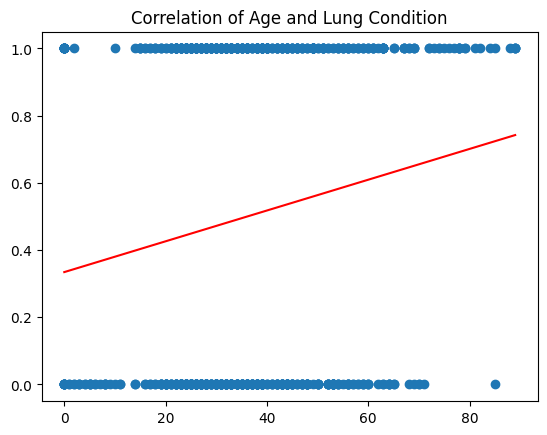

In [233]:
x = data['Age']
y = data['LC_binary']

plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
plt.title('Correlation of Age and Lung Condition')

From the above graph, it is evident that, people face lung abnormalities as their age increases. 